# Risque Sécheresse 

**Mesure du degré de sécheresse associé à la localisation donnée (utilisation d'une mesure de degré de gonflement/retrait d'argile pour refléter le niveau de sécheresse).**

* Importation des packages nécessaires (pour data visualisation, manipulation de données géographiques) 
* Création de la carte de sécheresse du département considéré (associé à l'adresse de l'utilisateur) + précision de l'adresse précise sur cette carte 
* Calcul d'un score moyen de sécheresse dans le département 



##### Packages nécessaires à installer/importer

**Importation et installation des packages nécessaires :**

In [ ]:
pip install geopandas

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
pip install contextily

In [5]:
import geopandas as gpd 
import contextily as ctx

In [ ]:
!pip install --upgrade botocore==1.23.26  #Sur colab, sinon bug
!pip install --upgrade urllib3==1.22.0 #Sur colab, sinon bug
!pip install py7zr #Sur colab, sinon bug
!pip install s3fs #Sur colab, sinon bug
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .


##### Informations entrées par l'utilisateur 

**Entrées de l'utilisateur :**

In [7]:
#Entree par l'utilisateur de info sur son domicile 
dep = (input("Departement"))
num = int(input("Numero"))
nom_voie = input("Nom de la voie")
ville = input('Ville')
code_postal = input("Code postal")

Departement31
Numero23
Nom de la voieAllée de la Sambre
VilleColomiers
Code postal31770


In [8]:
#Ce csv d'une ligne correspond à la ligne qui nous intéresse sur la base des adresses nationales
#C'est pour avoir accès aux coord GPS du foyer conrespondant à l'adresse mise en input 
foyer_infos = pd.read_csv("/content/foyer.csv")

#### **Fonction principale : mesure et visualisation du niveau de sécheresse à proximité de l'adresse postale donnée**

In [29]:
def secheresse(dep,num,nom_voie,ville,code_postal):

  #Récupération des données concernant le domicile de l'utilisateur 
  #adresses_dep = pd.read_csv("/Users/sophiebataille/Desktop/Projet_Python/Adresses/adresses-"+dep+".csv", sep=";", error_bad_lines=False) #recuperation des adresses postales correspondant au département de l'utilisateur
  #foyer_infos = adresses_dep[(adresses_dep["numero"] == num) & (adresses_dep["nom_commune"] == ville) & (adresses_dep["nom_voie"] == nom_voie)] 

  df_secheresse = gpd.read_file("/content/AleaRG"+dep+"_L93.shp") #dataframe contenant les zones arigleuses du département donné 
  df_secheresse.to_csv() #conversion du fichier en csv 


  #Calcul du score moyen de "sécheresse" (i.e. niveau de gonflement/retrait d'argile, échelle de 1 à 3) du département considéré 
  argile_dep = np.mean(df_secheresse["niveau"])

  #Conversion des coordonnées GPS d'un point en une géométrie exploitable sur Geopandas 
  geometry = gpd.points_from_xy(foyer_infos["lon"], foyer_infos["lat"])

  #Création des dataframe avec geométrie du point à localiser 
  geo_foyer = gpd.GeoDataFrame(foyer_infos, crs="EPSG:4326", geometry=geometry)
  geo_foyer.crs
  #print(geo_foyer) #TEST 

  df_1 = df_secheresse[df_secheresse.niveau == 1]
  df_2 = df_secheresse[df_secheresse.niveau == 2]
  df_3 = df_secheresse[df_secheresse.niveau == 3]
  df_1.crs
  df_2.crs
  df_3.crs 
  df_secheresse.crs

  #print(df_secheresse.head()) #TEST

  #Cartographie des zones de sécheresse (selon le degré de gonflement/retrait des argiles) dans le département 31 
  fig,ax = plt.subplots(figsize=(10, 10)) 
  df_1.to_crs(3857).plot(ax = ax, color ='yellow', alpha = 0.6,zorder=2)
  df_2.to_crs(3857).plot(ax = ax, color ='orange', alpha = 0.6,zorder=2)
  df_3.to_crs(3857).plot(ax = ax, color ='red', alpha = 0.6,zorder=2)
  geo_foyer.to_crs(3857).plot(ax=ax, color="black",zorder=2)
  ax.set_title("Cartographie des zones de sécheresse préocupantes en Haute-Garonne")
  fig.legend()
  ctx.add_basemap(ax=ax,source=ctx.providers.OpenStreetMap.Mapnik)
  plt.show()

  #Fonction position géographique de l'habitation -> risque sécheresse précis associé
  def risque(geometry):
    risque=[]
    for k in range(len(df_secheresse["geometry"])):
      if df_secheresse["geometry"][k].contains(geometry):
        risque.append(df_secheresse["alea"][k])
    return(risque)
  
  print("Le niveau de sécheresse moyen dans le département est de : "+str(argile_dep))
  print("Le score de sécheresse (de 1 à 5) de l'habitation est de :")
  return(risque(geo_foyer["geometry"]))



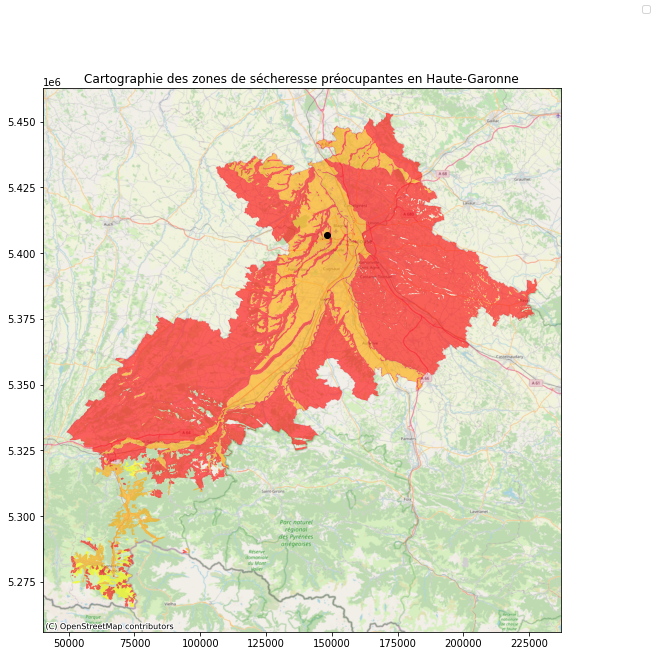

Le niveau de sécheresse moyen dans le département est de : 2.104147465437788
Le score de sécheresse (de 1 à 5) de l'habitation est de :


ValueError: ignored

In [30]:
secheresse(dep,num,nom_voie,ville,code_postal)

#### Mesure du risque sécheresse précis pour l'habitation considérée
####Déjà inclu dans la fonction principale mais si vous voulez récupérer la fonction : 

In [19]:
#Fonction position géographique de l'habitation -> risque sécheresse précis associé
def risque(geometry):
  for k in range(len(df_secheresse["geometry"])):
    if df_secheresse["geometry"].contains(geometry):
      risque.append(df_secheresse["alea"][k])
  
  return(risque)

In [20]:
print(risque(geo_foyer["geometry"]))

NameError: ignored

####NO

In [ ]:
 #Création du fond de carte associé au département de l'adresse considérée 
    shp_31 = cartiflette.s3.download_vectorfile_url_all(
      values = ["dep"],
      level="COMMUNE",
      vectorfile_format="geojson",
      decoupage="departement",
      year=2022)

    shp_31.crs

  #Contour de la ville considérée 
  shp_ville = shp_31[shp_31.NOM == 'ville']
  shp_ville.head()

  #Visualisation de la répartition des zones argileuses sur le département + mise en évidence de la ville considérée 
  fig,ax = plt.subplots(figsize=(10, 10)) 
  df_secheresse.to_crs(3857).plot(ax = ax,alpha=0.6,zorder=1,cmap ='plasma')
  geo_foyer.to_crs(3857).plot(ax=ax,markersize=50,color='black')
  shp_31.to_crs(3857).plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none",
                                                           color = None)
  shp_ville.to_crs(3857).plot(ax = ax, zorder=2, edgecolor = "red", facecolor="none",
                                                           color = None)